In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
EEG_DATA = pd.read_csv("EEG_DATA.csv")

In [3]:
EEG_DATA.columns

Index(['SubjectID', 'VideoID', 'Time (Seconds)',
       'Attention - Measure of mental focus',
       'Mediation - Measure of calmness',
       'Delta (μV²) - 1-3 Hz of power spectrum',
       'Theta (μV²) - 4-7 Hz of power spectrum',
       'Alpha1 (μV²) - Lower 8-11 Hz of power spectrum',
       'Alpha2 (μV²) - Higher 8-11 Hz of power spectrum',
       'Beta1 (μV²) - Lower 12-29 Hz of power spectrum',
       'Beta2 (μV²)  - Higher 12-29 Hz of power spectrum)',
       'Gamma1 (μV²) - Lower 30-100 Hz of power spectrum',
       'Gamma2 (μV²) - Higher 30-100 Hz of power spectrum',
       'Expectation - Whether the subject is expected to be confused.',
       'Confusion - Whether the subject is actually confused'],
      dtype='object')

## Average perceived focus compared to different types of waves.

In [4]:
Subjects = [0, 1, 2, 3, 4, 5, 7, 8, 9]

EEG_DATA_1 = EEG_DATA[EEG_DATA["SubjectID"].isin(Subjects)].copy()

EEG_DATA_1["Average Gamma (μV²)"] = EEG_DATA_1[
    ["Gamma1 (μV²) - Lower 30-100 Hz of power spectrum", "Gamma2 (μV²) - Higher 30-100 Hz of power spectrum"]
].mean(axis=1)

EEG_DATA_1["Average Alpha (μV²)"] = EEG_DATA_1[
    ["Alpha1 (μV²) - Lower 8-11 Hz of power spectrum", "Alpha2 (μV²) - Higher 8-11 Hz of power spectrum"]
].mean(axis=1)

EEG_DATA_1["Average Beta (μV²)"] = EEG_DATA_1[
    ["Beta1 (μV²) - Lower 12-29 Hz of power spectrum", "Beta2 (μV²)  - Higher 12-29 Hz of power spectrum)"]
].mean(axis=1)


In [5]:
EEG_DATA_1 = EEG_DATA_1[[
    'VideoID',
    "Average Gamma (μV²)",
    "Average Alpha (μV²)",
    "Average Beta (μV²)",
    "Delta (μV²) - 1-3 Hz of power spectrum",
    "Theta (μV²) - 4-7 Hz of power spectrum",
    "Attention - Measure of mental focus", "Mediation - Measure of calmness"]]

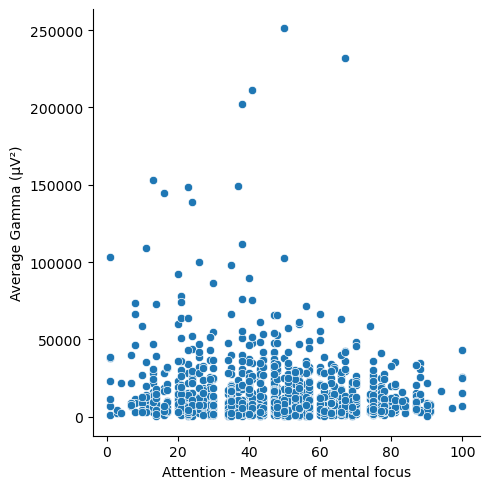

In [6]:
EEG_DATA_1_0 = EEG_DATA_1[EEG_DATA_1["VideoID"] == 0]

sns.relplot(data = EEG_DATA_1_0, x = "Attention - Measure of mental focus", y = "Average Gamma (μV²)")

In [7]:
columns_to_average = [
    "Average Gamma (μV²)",
    "Average Alpha (μV²)",
    "Average Beta (μV²)",
    "Delta (μV²) - 1-3 Hz of power spectrum",
    "Theta (μV²) - 4-7 Hz of power spectrum",
    "Attention - Measure of mental focus", 
    "Mediation - Measure of calmness"]
    
EEG_DATA_video = EEG_DATA_1.groupby("VideoID")[columns_to_average].mean().reset_index().round(2)
EEG_DATA_video["VideoID"] = EEG_DATA_video["VideoID"].astype(int)

In [8]:
EEG_DATA_video

,VideoID,Average Gamma (μV²),Average Alpha (μV²),Average Beta (μV²),Delta (μV²) - 1-3 Hz of power spectrum,Theta (μV²) - 4-7 Hz of power spectrum,Attention - Measure of mental focus,Mediation - Measure of calmness
0,0,13920.17,31910.18,23183.33,530915.11,142718.24,48.63,52.21
1,1,11285.56,29952.19,22239.29,589543.98,143610.94,49.84,52.40
2,2,10623.39,30136.69,20097.92,566320.92,142600.15,49.21,55.14
3,3,11694.70,34918.29,23872.43,677343.91,175941.68,33.10,45.76
4,4,12646.70,35640.76,23712.89,574059.80,168105.20,47.01,54.11
5,5,16906.86,42095.06,25428.45,671977.12,196416.76,50.55,53.71
6,6,10464.54,34844.96,20343.00,593695.57,169822.46,44.50,53.18
7,7,12126.45,26944.32,19622.31,554053.53,137403.66,43.90,50.84
8,8,15504.55,32983.84,22740.08,631886.26,162236.98,47.90,53.00
9,9,10414.27,34704.68,22841.71,522132.63,153934.47,42.61,53.19


In [25]:
EEG_DATA_video.columns

Index(['VideoID', 'Average Gamma (μV²)', 'Average Alpha (μV²)',
       'Average Beta (μV²)', 'Delta (μV²) - 1-3 Hz of power spectrum',
       'Theta (μV²) - 4-7 Hz of power spectrum',
       'Attention - Measure of mental focus',
       'Mediation - Measure of calmness'],
      dtype='object')

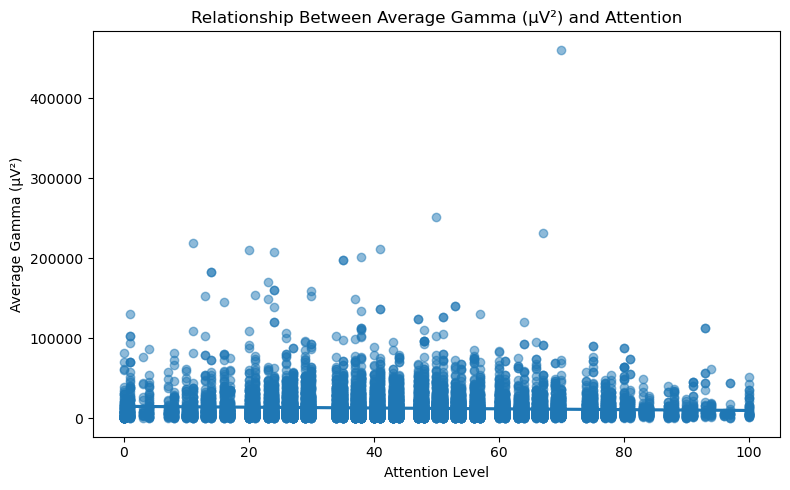

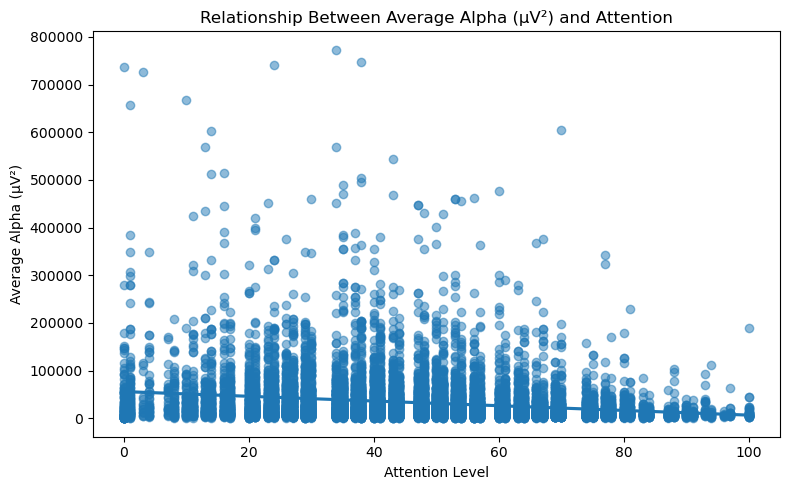

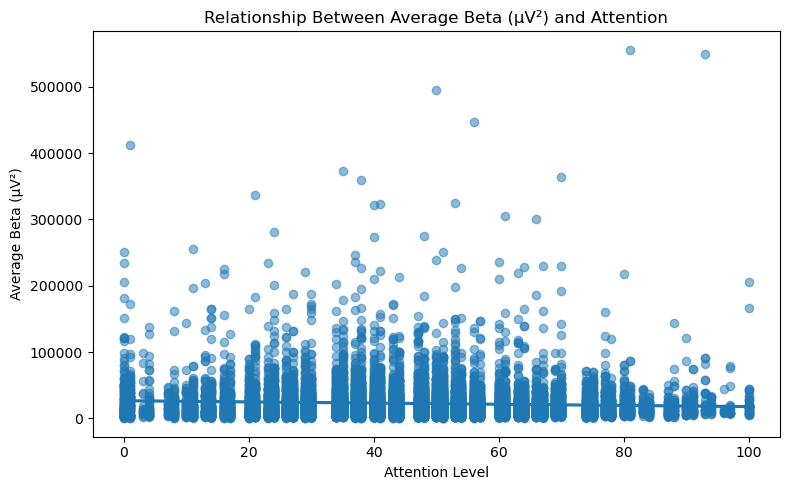

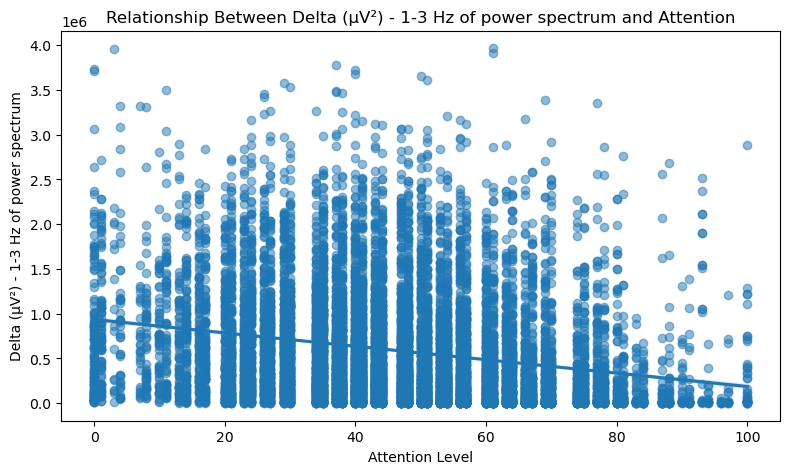

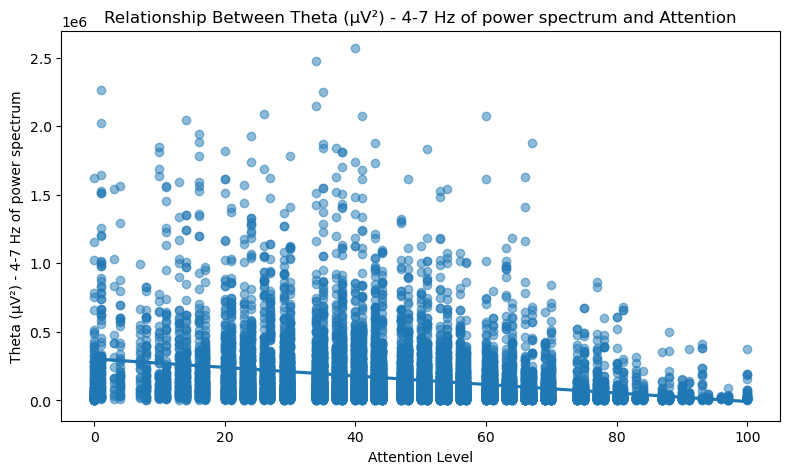

In [17]:
wave_columns = [
    "Average Gamma (μV²)",
    "Average Alpha (μV²)",
    "Average Beta (μV²)",
    "Delta (μV²) - 1-3 Hz of power spectrum",
    "Theta (μV²) - 4-7 Hz of power spectrum"
]

# Plot each wave against attention
for wave in wave_columns:
    fig, ax = plt.subplots(figsize=(8, 5))
    sns.regplot(data=EEG_DATA_1, y=wave, x="Attention - Measure of mental focus", scatter_kws={'alpha': 0.5}, ax=ax)
    
    ax.set_title(f"Relationship Between {wave} and Attention")
    ax.set_ylabel(wave)
    ax.set_xlabel("Attention Level")
    
    # Make background transparent
    fig.patch.set_alpha(0.0)  # Transparent figure background
    ax.set_facecolor("none")  # Transparent axes background

    plt.tight_layout()
    plt.show()


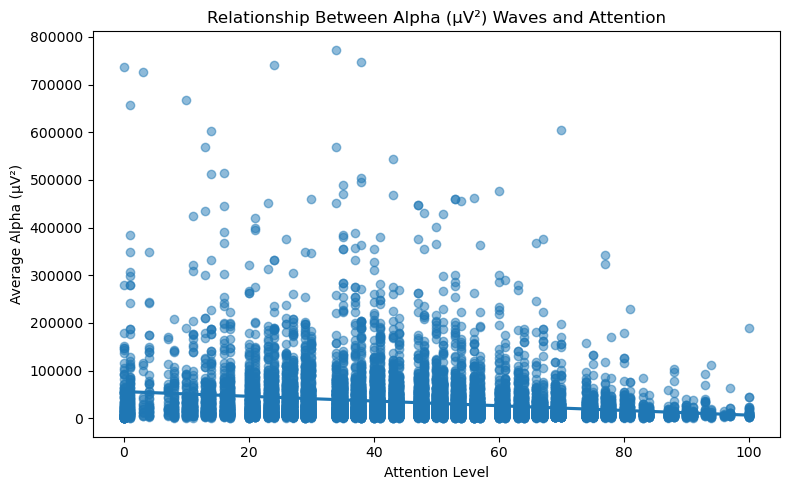

In [21]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.regplot(data=EEG_DATA_1, y="Average Alpha (μV²)", x="Attention - Measure of mental focus", scatter_kws={'alpha': 0.5}, ax=ax)
    
ax.set_title(f"Relationship Between Alpha (μV²) Waves and Attention")
ax.set_ylabel("Average Alpha (μV²)")
ax.set_xlabel("Attention Level")
    
    # Make background transparent
fig.patch.set_alpha(0.0)  # Transparent figure background
ax.set_facecolor("none")  # Transparent axes background

plt.tight_layout()
plt.show()

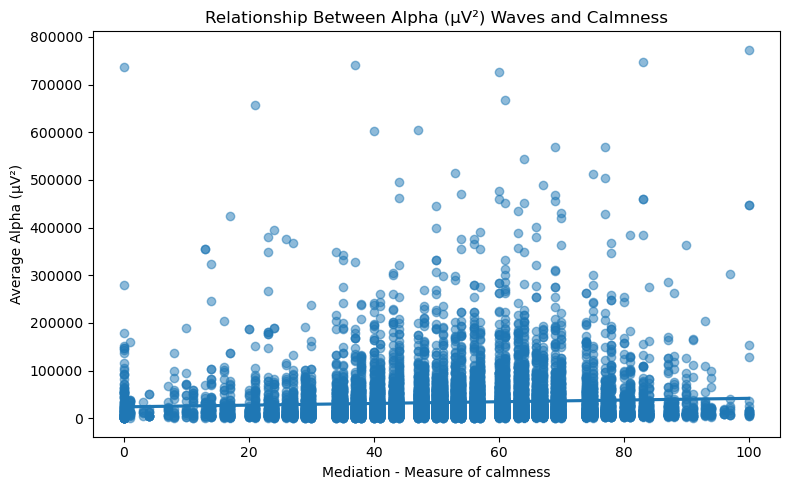

In [23]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.regplot(data=EEG_DATA_1, y="Average Alpha (μV²)", x="Mediation - Measure of calmness", scatter_kws={'alpha': 0.5}, ax=ax)
    
ax.set_title(f"Relationship Between Alpha (μV²) Waves and Calmness")
    
    # Make background transparent
fig.patch.set_alpha(0.0)  # Transparent figure background
ax.set_facecolor("none")  # Transparent axes background

plt.tight_layout()
plt.show()

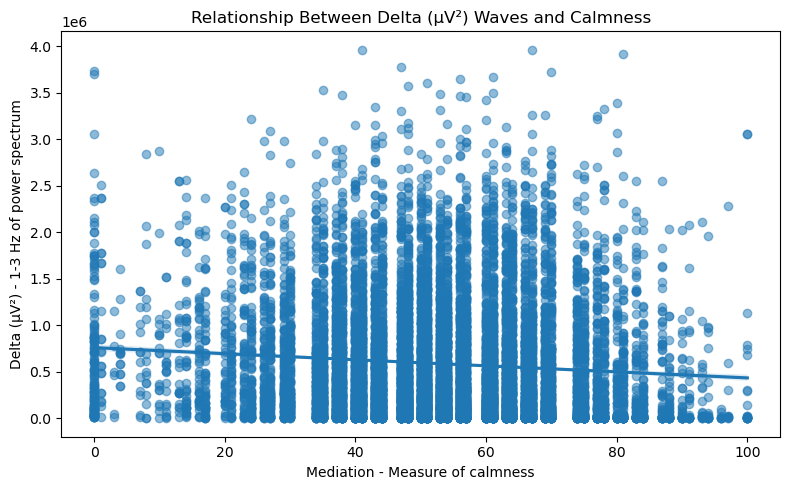

In [24]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.regplot(data=EEG_DATA_1, y="Delta (μV²) - 1-3 Hz of power spectrum", x="Mediation - Measure of calmness", scatter_kws={'alpha': 0.5}, ax=ax)
    
ax.set_title(f"Relationship Between Delta (μV²) Waves and Calmness")
    
    # Make background transparent
fig.patch.set_alpha(0.0)  # Transparent figure background
ax.set_facecolor("none")  # Transparent axes background

plt.tight_layout()
plt.show()

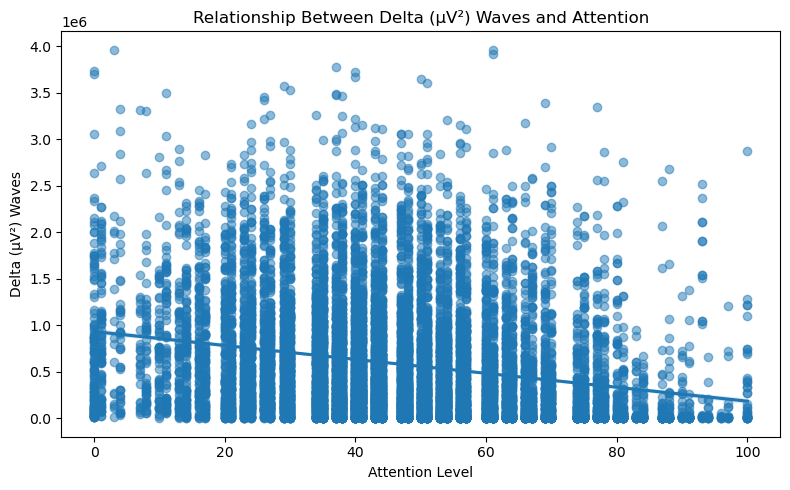

In [22]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.regplot(data=EEG_DATA_1, y="Delta (μV²) - 1-3 Hz of power spectrum", x="Attention - Measure of mental focus", scatter_kws={'alpha': 0.5}, ax=ax)
    
ax.set_title(f"Relationship Between Delta (μV²) Waves and Attention")
ax.set_ylabel("Delta (μV²) Waves")
ax.set_xlabel("Attention Level")
    
    # Make background transparent
fig.patch.set_alpha(0.0)  # Transparent figure background
ax.set_facecolor("none")  # Transparent axes background

plt.tight_layout()
plt.show()

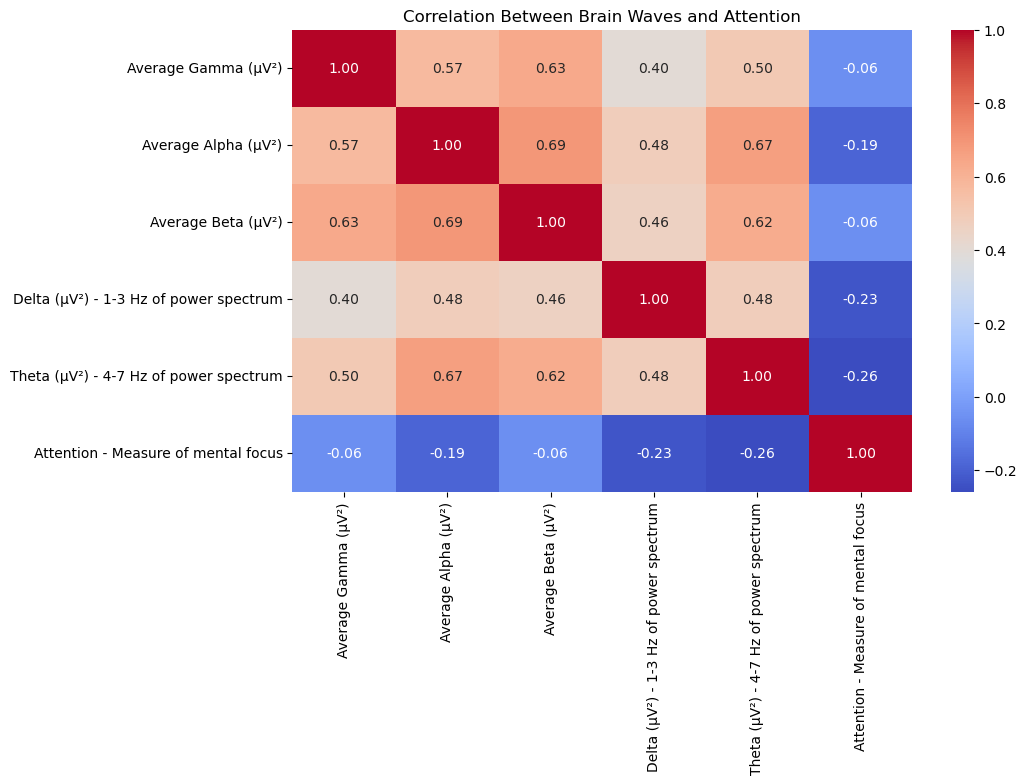

In [10]:
corr_df = EEG_DATA_1[wave_columns + ["Attention - Measure of mental focus"]]

corr_matrix = corr_df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Brain Waves and Attention")
plt.show()


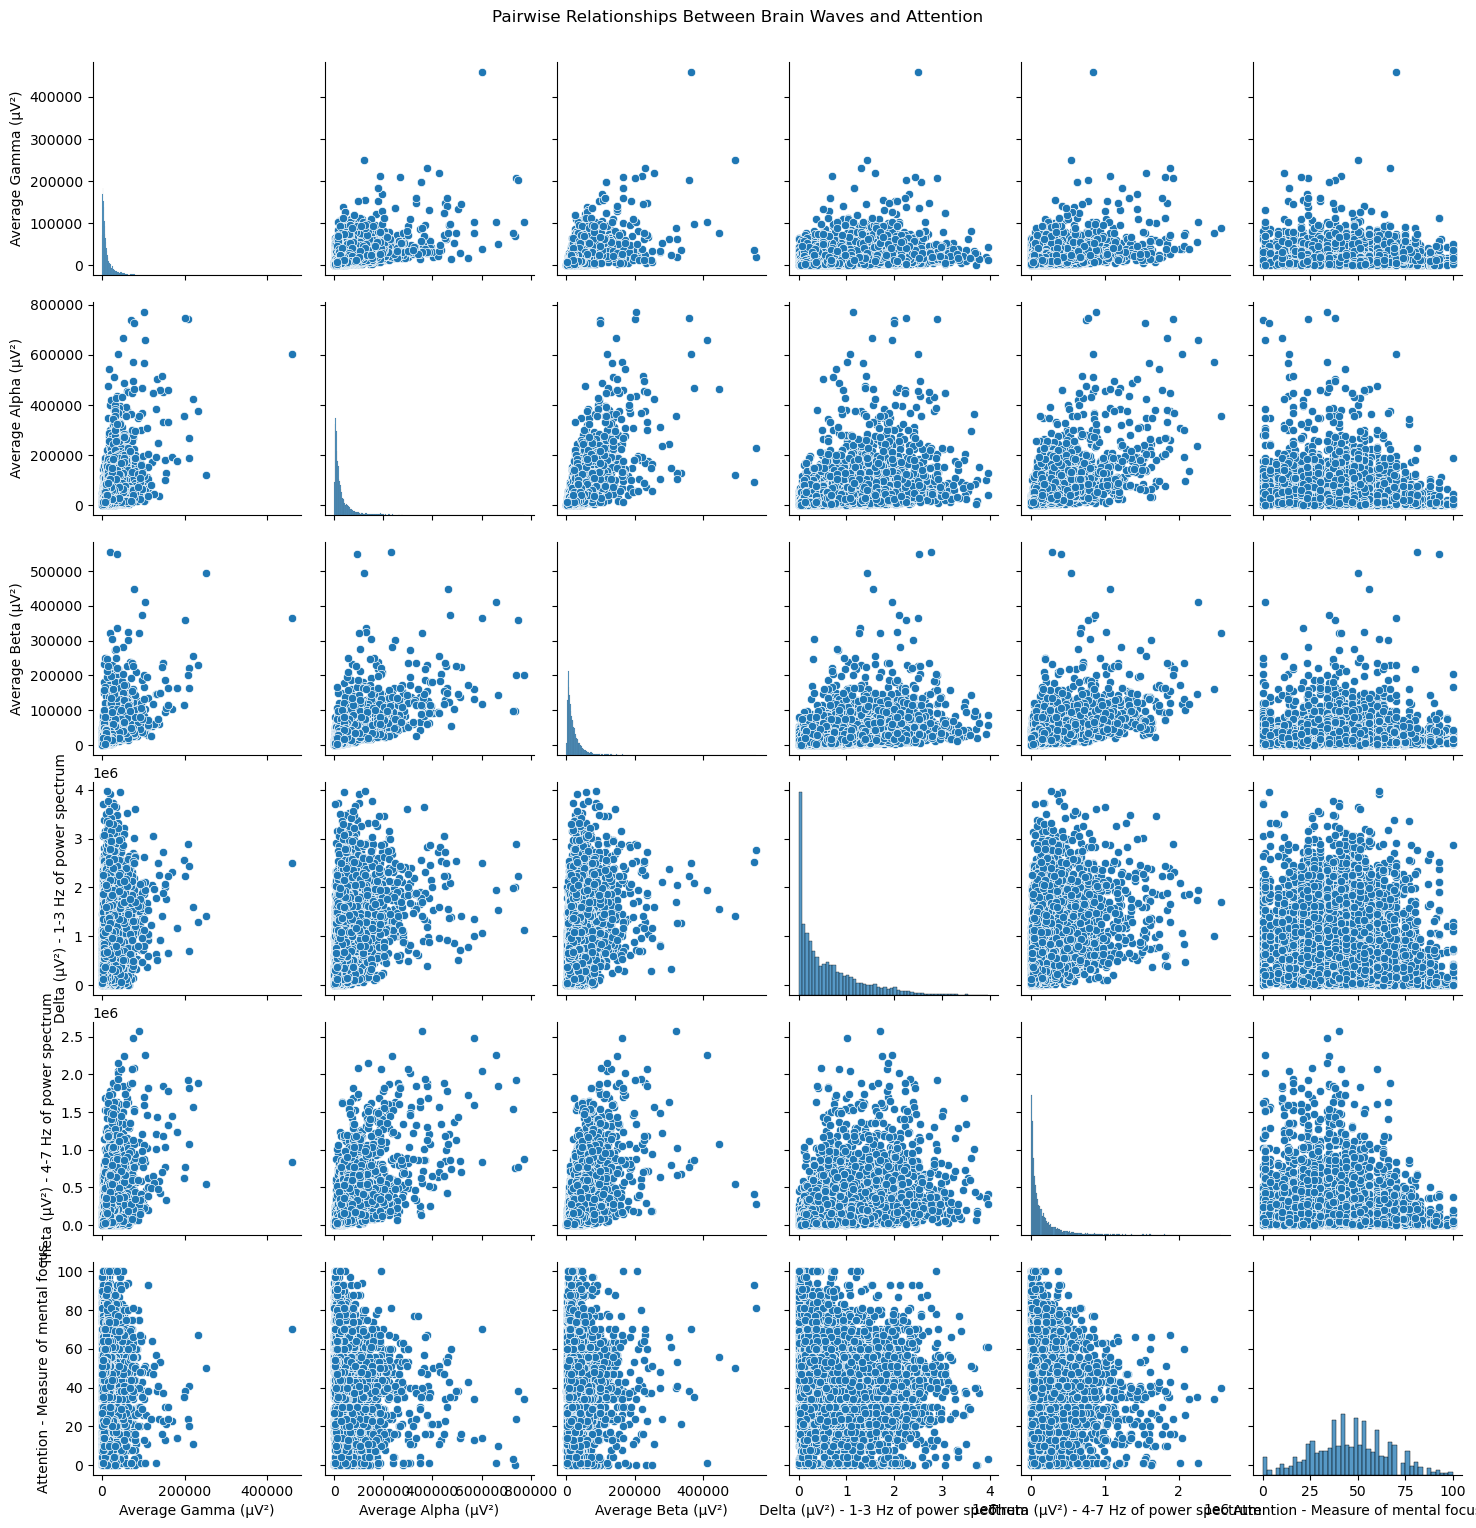

In [11]:
sns.pairplot(EEG_DATA_1[wave_columns + ["Attention - Measure of mental focus"]])
plt.suptitle("Pairwise Relationships Between Brain Waves and Attention", y=1.02)
plt.show()


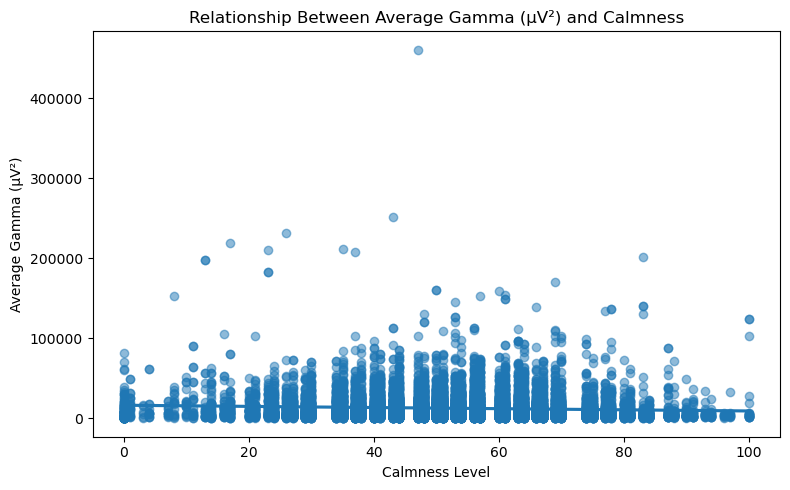

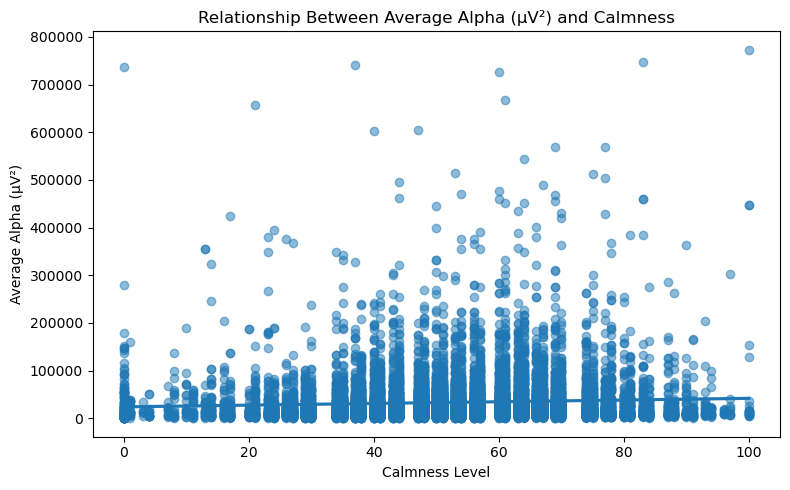

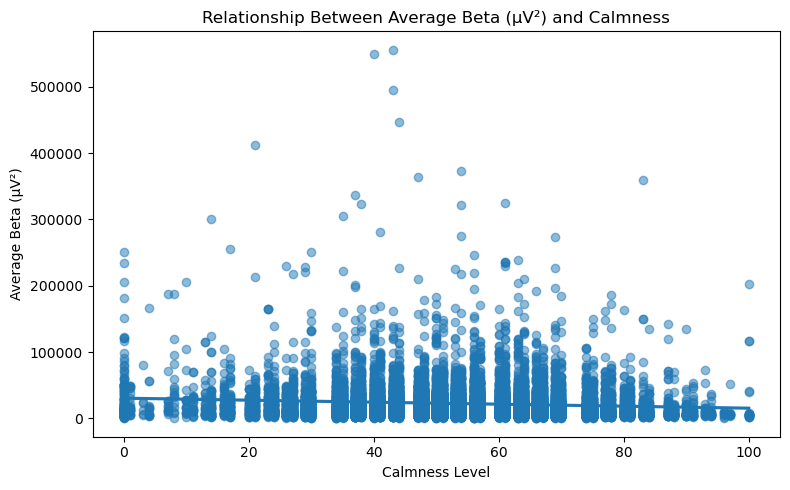

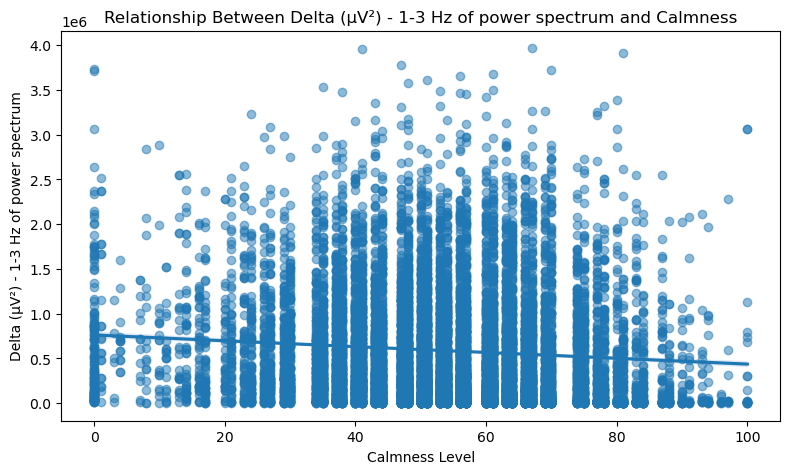

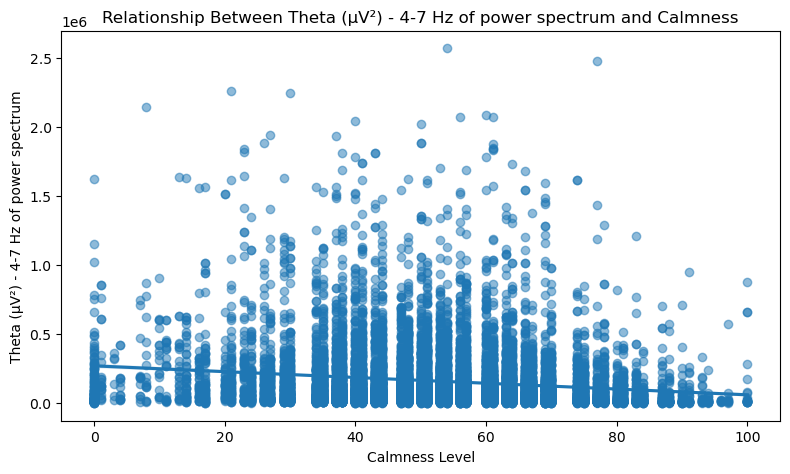

In [15]:
for wave in wave_columns:
    plt.figure(figsize=(8, 5))
    sns.regplot(data=EEG_DATA_1, y=wave, x="Mediation - Measure of calmness", scatter_kws= {'alpha' : 0.5} )
    plt.title(f"Relationship Between {wave} and Calmness")
    plt.ylabel(wave)
    plt.xlabel("Calmness Level")
    plt.tight_layout()
    plt.show()

In [26]:
EEG_DATA_1.columns

Index(['VideoID', 'Average Gamma (μV²)', 'Average Alpha (μV²)',
       'Average Beta (μV²)', 'Delta (μV²) - 1-3 Hz of power spectrum',
       'Theta (μV²) - 4-7 Hz of power spectrum',
       'Attention - Measure of mental focus',
       'Mediation - Measure of calmness'],
      dtype='object')

In [29]:
EEG_DATA_1["Delta (μV²) - 1-3 Hz of power spectrum"].corr(
    EEG_DATA_1["Mediation - Measure of calmness"])

-0.08820854621874342